In [1]:
import pandas as pd
import numpy as np

In [2]:
hpi = pd.DataFrame(pd.read_csv('hpi_final.csv'))
cpb = pd.DataFrame(pd.read_csv('cpb_final.csv'))
bps = pd.DataFrame(pd.read_csv('building_permits_final.csv'))
pop = pd.DataFrame(pd.read_csv('../../../../House_Value_Predict_Project3/Population_Change.csv'))
inc = pd.DataFrame(pd.read_csv('../../../../House_Value_Predict_Project3/county_income.csv'))

hpi2 = pd.DataFrame(pd.read_csv('hpi_final2.csv'))

In [3]:
hpi2 = hpi2.rename(columns = {
    'one_year': 'previous_one',
    'two_years': 'previous_two',
    'three_years': 'previous_three',
    'four_years': 'previous_four',
    'five_years': 'previous_five',
    'county': 'county_code'
})

pop = pop[['Id2','pop_chg_yoy','year','one_year', 'two_years', 'three_years', 'four_years', 'five_years']]
pop = pop.rename(columns = {
    'Id2': 'county_code',
    'one_year': 'one_year_pop',
    'two_years': 'two_years_pop',
    'three_years': 'three_years_pop',
    'four_years': 'four_years_pop',
    'five_years': 'five_years_pop'
})

hpi = hpi[['county', 'year', 'hpi','one_year', 'two_years', 'three_years',
       'four_years', 'five_years'
          ]].rename(columns={'county': 'county_code'})

bps = bps[['date', 'county_code', 'single_units', 'total_units']].rename(columns={'date': 'year'})

cpb['one_year_emp']=cpb['EMP'].shift(1)
cpb['two_years_emp']=cpb['EMP'].shift(2)
cpb['three_years_emp']=cpb['EMP'].shift(3)
cpb['four_years_emp']=cpb['EMP'].shift(4)
cpb['five_years_emp']=cpb['EMP'].shift(5)
cpb['one_year_estab']=cpb['ESTAB'].shift(1)
cpb['two_years_estab']=cpb['ESTAB'].shift(2)
cpb['three_years_estab']=cpb['ESTAB'].shift(3)
cpb['four_years_estab']=cpb['ESTAB'].shift(4)
cpb['five_years_estab']=cpb['ESTAB'].shift(5)
cpb['one_year_pay']=cpb['PAYANN'].shift(1)
cpb['two_years_pay']=cpb['PAYANN'].shift(2)
cpb['three_years_pay']=cpb['PAYANN'].shift(3)
cpb['four_years_pay']=cpb['PAYANN'].shift(4)
cpb['five_years_pay']=cpb['PAYANN'].shift(5)


cpb = cpb[['county_code', 'year', 'EMP', 'ESTAB', 'PAYANN',
           'one_year_emp',
       'two_years_emp', 'three_years_emp', 'four_years_emp', 'five_years_emp',
       'one_year_estab', 'two_years_estab', 'three_years_estab',
       'four_years_estab', 'five_years_estab', 'one_year_pay', 'two_years_pay',
       'three_years_pay', 'four_years_pay', 'five_years_pay'
          ]]



In [4]:
inc = inc[['county_code', 'year', 'hh_income']]

gb = inc.groupby(['county_code', 'year']).mean()


def percent_change(gb):
    gb['one_year_inc']=gb['hh_income'].pct_change(periods=1)
    gb['two_years_inc']=gb['hh_income'].pct_change(periods=2)
    gb['three_years_inc']=gb['hh_income'].pct_change(periods=3)
    gb['four_years_inc']=gb['hh_income'].pct_change(periods=4)
    gb['five_years_inc']=gb['hh_income'].pct_change(periods=5)
    
    return gb

inc = gb.groupby(level=0).apply(percent_change)

inc.head()

hh_income  one_year_inc  two_years_inc  three_years_inc  \
county_code year                                                            
1001        2007      18275           NaN            NaN              NaN   
            2008      18373      0.005363            NaN              NaN   
            2009      18288     -0.004626       0.000711              NaN   
            2010      19718      0.078193       0.073205         0.078960   
            2011      19998      0.014200       0.093504         0.088445   

                  four_years_inc  five_years_inc  
county_code year                                  
1001        2007             NaN             NaN  
            2008             NaN             NaN  
            2009             NaN             NaN  
            2010             NaN             NaN  
            2011        0.094282             NaN

In [5]:
df = pd.merge(hpi, cpb, how='inner', on=['county_code', 'year'])

df1 = pd.merge(df, bps, how='inner', on=['county_code', 'year'])

del df

df2 = pd.merge(df1, pop, how='inner', on = ['county_code', 'year'])

del df1

df3 = pd.merge(df2, inc.reset_index(), how="inner", on = ['county_code', 'year'])

del df2

df4 = pd.merge(df3, hpi2, how='inner', on=['county_code', 'year'])

del df3

df4.head()

,county_code,year,hpi_x,one_year,two_years,three_years,four_years,five_years,EMP,ESTAB,...,two_years_inc,three_years_inc,four_years_inc,five_years_inc,hpi_y,previous_one,previous_two,previous_three,previous_four,previous_five
0,10001,2010,162.912258,-0.066988,-0.093230,-0.094294,-0.079433,-0.055848,46405,3200,...,0.008558,0.030726,0.035580,NaN,162.912258,-0.069745,-0.139019,-0.160983,-0.141347,-0.046996
1,10001,2011,151.999032,-0.028126,-0.029266,-0.013338,0.011940,0.075964,48100,3177,...,0.015668,0.012652,0.034911,0.039784,151.999032,-0.066988,-0.132061,-0.196695,-0.217187,-0.198867
2,10001,2012,147.723871,-0.001173,0.015216,0.041226,0.107103,0.113881,47883,3119,...,0.007318,0.018964,0.015938,0.038269,147.723871,-0.028126,-0.093230,-0.156473,-0.219289,-0.239205
3,10001,2013,147.550645,0.016408,0.042448,0.108403,0.115188,0.156970,48071,3166,...,0.015530,0.019653,0.031442,0.028379,147.550645,-0.001173,-0.029266,-0.094294,-0.157462,-0.220204
4,10001,2014,149.971613,0.025620,0.090510,0.097186,0.138293,NaN,49311,3263,...,0.022935,0.026254,0.030420,0.042333,149.971613,0.016408,0.015216,-0.013338,-0.079433,-0.143638


In [155]:
df4.head()

,county_code,year,hpi_x,one_year,two_years,three_years,four_years,five_years,EMP,ESTAB,...,two_years_inc,three_years_inc,four_years_inc,five_years_inc,hpi_y,previous_one,previous_two,previous_three,previous_four,previous_five
0,10001,2010,162.912258,-0.066988,-0.093230,-0.094294,-0.079433,-0.055848,46405,3200,...,0.008558,0.030726,0.035580,NaN,162.912258,-0.069745,-0.139019,-0.160983,-0.141347,-0.046996
1,10001,2011,151.999032,-0.028126,-0.029266,-0.013338,0.011940,0.075964,48100,3177,...,0.015668,0.012652,0.034911,0.039784,151.999032,-0.066988,-0.132061,-0.196695,-0.217187,-0.198867
2,10001,2012,147.723871,-0.001173,0.015216,0.041226,0.107103,0.113881,47883,3119,...,0.007318,0.018964,0.015938,0.038269,147.723871,-0.028126,-0.093230,-0.156473,-0.219289,-0.239205
3,10001,2013,147.550645,0.016408,0.042448,0.108403,0.115188,0.156970,48071,3166,...,0.015530,0.019653,0.031442,0.028379,147.550645,-0.001173,-0.029266,-0.094294,-0.157462,-0.220204
4,10001,2014,149.971613,0.025620,0.090510,0.097186,0.138293,NaN,49311,3263,...,0.022935,0.026254,0.030420,0.042333,149.971613,0.016408,0.015216,-0.013338,-0.079433,-0.143638


In [6]:
# bins = [0.0773-2*0.109,0.0773-0.109, 0.0773, 0.0773+0.109,0.0773+2*0.109, 0.0773+3*0.109]
# labels = [-2, -1, 0, 1, 2]

# df4['bin_three'] = pd.cut(df4['three_years'], bins=bins, labels = labels)


# bins = [0.137-2*0.155,0.137-0.155, 0.137, 0.137+0.155,0.137+2*0.155, 0.137+3*0.155]
# labels = [-2, -1, 0, 1, 2]

# df4['bin_five'] = pd.cut(df4['five_years'], bins=bins, labels = labels)

# bins = [0.0181-0.0594, 0.0181, 0.0181+0.0594, 0.0181+0.0594+0.01]
# labels = [-1, 0, 1]

# df4['bin_one'] = pd.cut(df4['one_year'], bins=bins, labels = labels)


# df4.head()

In [162]:
df5 = df4[[ 
    'previous_one', 
    'previous_two',
    'previous_three',
       'previous_four',
    'previous_five',
    'pop_chg_yoy',
    'EMP',
#     'ESTAB', 'PAYANN',
#     'one_year_emp',
#        'two_years_emp', 'three_years_emp', 'four_years_emp', 'five_years_emp',
#        'one_year_estab', 'two_years_estab', 'three_years_estab',
#        'four_years_estab', 'five_years_estab',
#     'one_year_pay', 'two_years_pay',
#        'three_years_pay', 'four_years_pay', 'five_years_pay',
    'single_units',
#        'total_units',
#     'one_year_pop', 'two_years_pop', 'three_years_pop',
#        'four_years_pop', 
#     'five_years_pop',
    'hh_income', 
#     'one_year_inc',
#        'two_years_inc', 'three_years_inc', 'four_years_inc',
#     'five_years_inc',
#     'hpi_x',
       'one_year',
           'two_years','three_years','four_years',
    'five_years'
          ]]

In [163]:
df5 = df5.replace([np.inf, -np.inf], np.nan)
df5 = df5.dropna()

In [164]:
X = df5.drop(['one_year', 'two_years','three_years','four_years','five_years'], axis=1)
# y = df5[['one_year','two_years','three_years','four_years','five_years']]
y=df5['hpi_x'].values

print(X.shape, y.shape)

(10175, 9) (10175,)


In [ ]:
# cov = np.cov(df5.values)

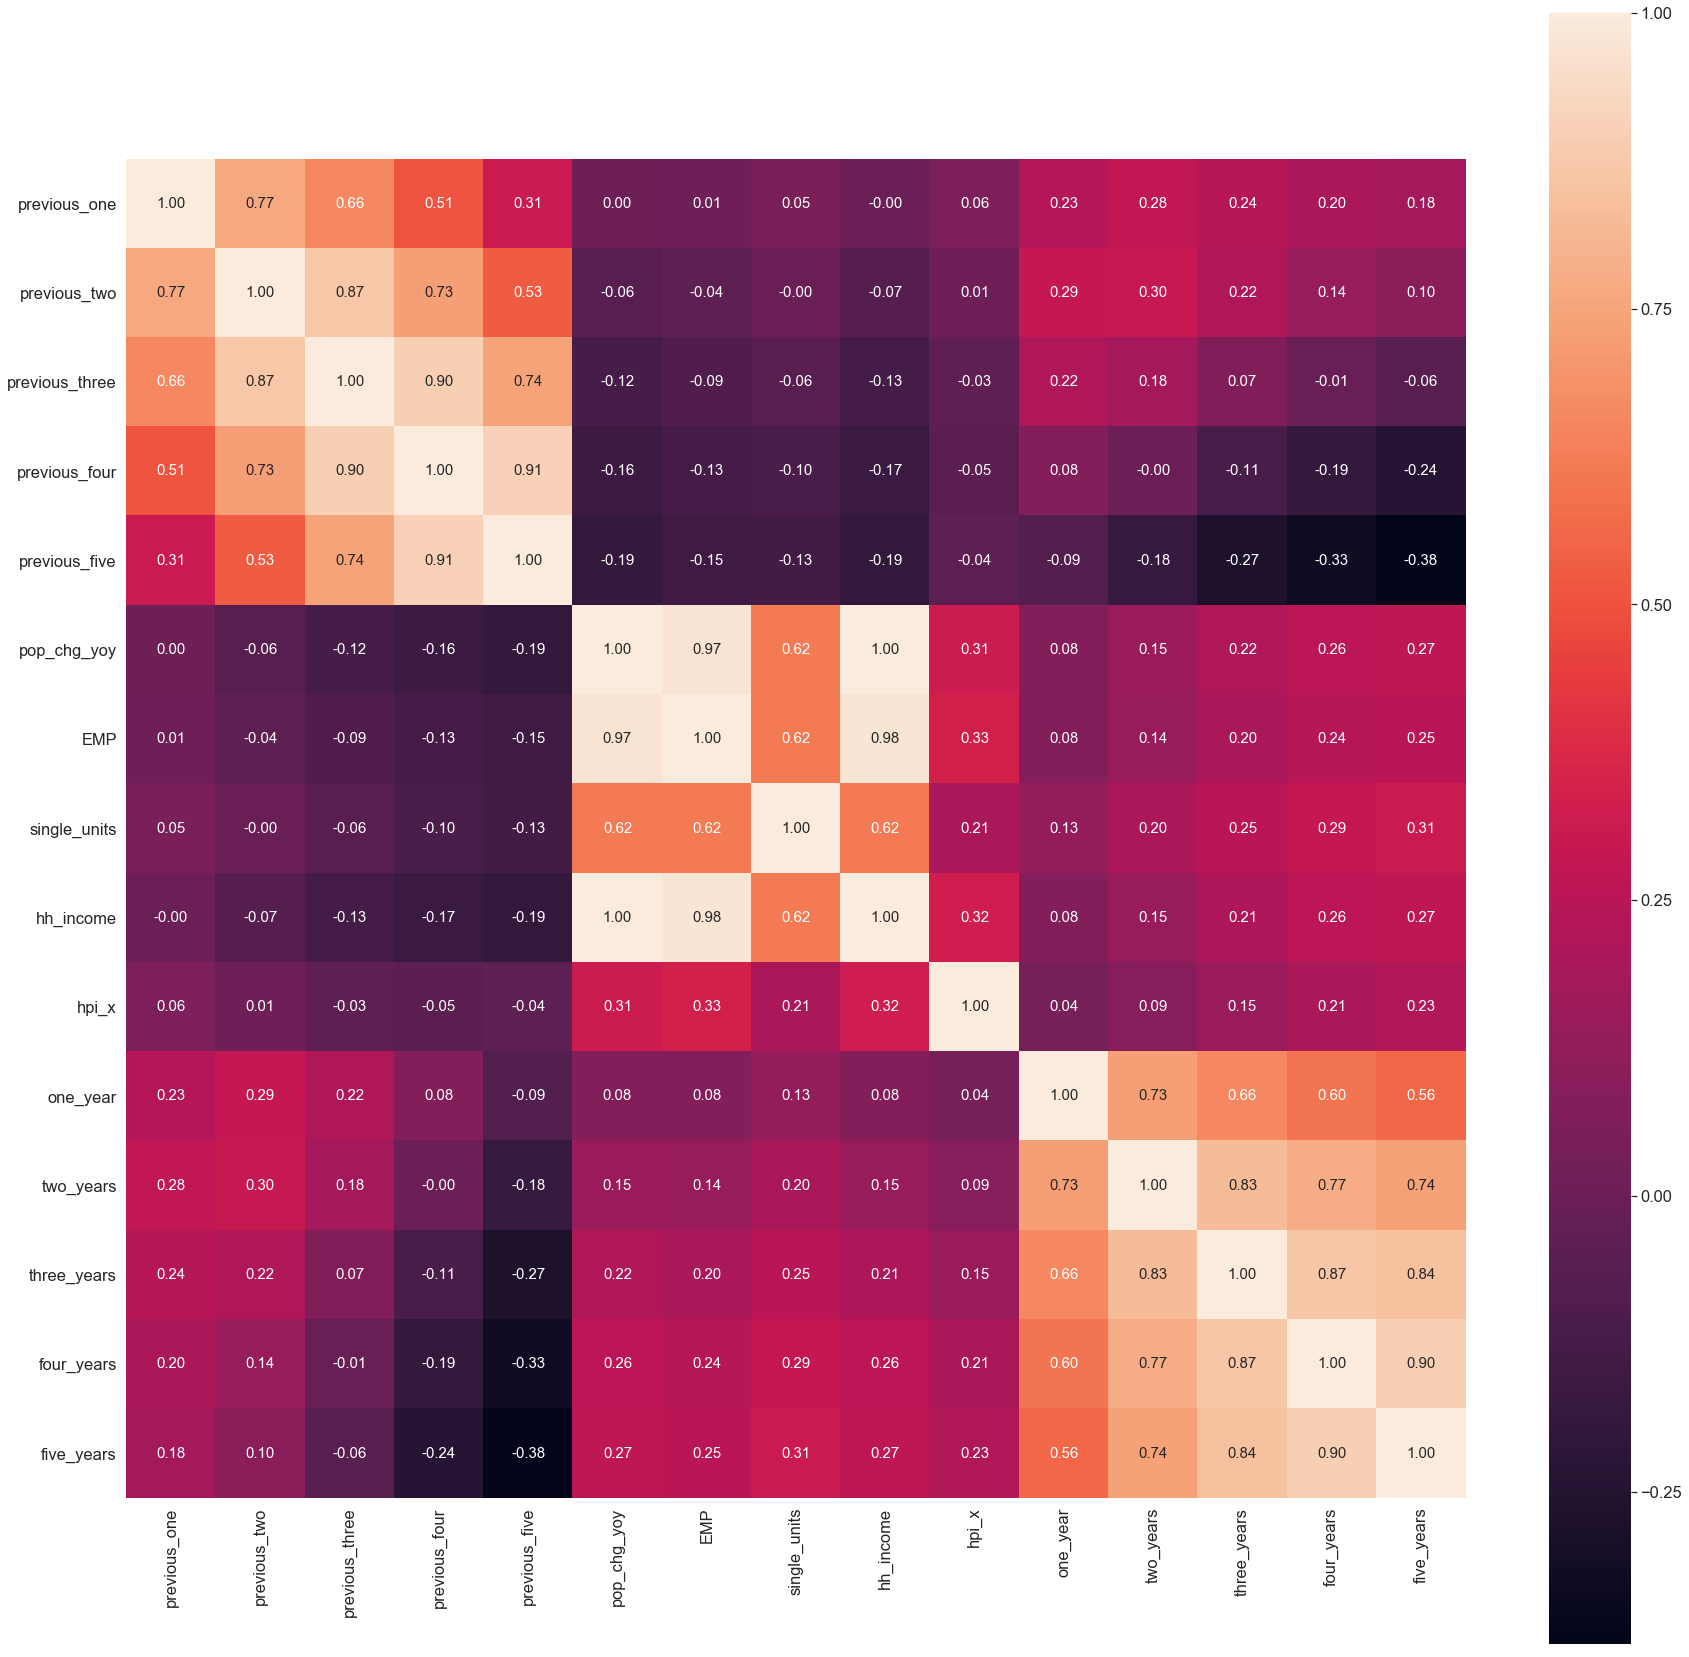

In [159]:
# Calculate and show correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns


cor = df5.corr()
%matplotlib inline
# cm = np.corrcoef(df5.values)
# sns.set(font_scale=1.5)
hm = sns.heatmap(cor,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=df5.columns,
                xticklabels=df5.columns)



fig = plt.gcf()
fig.set_size_inches( 30, 30)

plt.savefig('corrmatrix.png')

plt.show()

# plt.savefig('five_year_corr.png')

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X)
# y_scaler = StandardScaler().fit(y).reshape(-1, 1)

X_scaled = X_scaler.transform(X)
# y_scaled = y_scaler(y)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
print(f"MSE: {MSE}, R2: {r2}")


MSE: 0.015621738829063774, R2: 0.3415386007121358


In [166]:
from sklearn.metrics import  r2_score
r2 = r2_score(y_test, predictions)

print(r2)

0.3415386007121358


In [167]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=10)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



# # Step 1: Label-encode data set
# label_encoder = LabelEncoder()
# label_encoder.fit(y_train)
# encoded_y_train = label_encoder.transform(y_train)
# encoded_y_test = label_encoder.transform(y_test)

# # Step 2: Convert encoded labels to one-hot-encoding
# y_train_categorical = to_categorical(encoded_y_train)
# y_test_categorical = to_categorical(encoded_y_test)

In [124]:
from keras.models import Sequential
from keras.layers import Dense

# Create model and add layers
model = Sequential()
model.add(Dense(units=36, activation='sigmoid', input_dim=7))
model.add(Dense(units=1, activation='linear'))

In [125]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mea'])
model.fit(
    X_train_scaled,
    y_train,
    epochs=10,
    shuffle=True,
    verbose=20
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [126]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.004497106746424857, Accuracy: 0.0023584905660377358


In [127]:
encoded_predictions = model.predict_classes(X_test_scaled[:2944])
# prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [62]:
print(f"Predicted classes: {encoded_predictions}")
print(f"Actual Labels: {list(y_test[:100])}")

Predicted classes: [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
Actual Labels: [0.1315026907685941, 0.2697173354417868, 0.11154402370020923, 0.2259231236300077, 0.0855401182790918, 0.17173895338629785, 0.20437108631090228, 0.6539165480248166, 0.034208027014668074, 0.2342800097890272, 0.4013201170201972, 0.1342903347822182, 0.14548489813583942, 0.4937756080062328, 0.20086554811725146, 0.034527993678817204, 0.05608221767587307, -0.013091122123621736, 0.11222030319752374, 0.11055443885856532, 0.2119297145036103, 0.2095133517935006, 0.2565673446482481, 0.010965444687221826, 0.19666538900337027, 0.1979866268597794, 0.034854514800839675, 0.04590726712978888, 0.10995888762617813, 0.10335471139615172, 0.12056986455189822, 0.22414790693919293, 0.07431873726561755, 0.2147724476200985, 0.14596949891067568, 0.21099912357581085, 0.24497627097632454, 0.3140924999891572, 0.05676587186925719, 0.011805804455868651, 0.03896958359696656, 0.10063706858595922, 0.2767162823013813, 0.26972410976242056, 0.259667391230

In [44]:
predictions = pd.DataFrame({
    'predictions': prediction_labels,
    'actual': y_test
})

NameError: name 'prediction_labels' is not defined

In [ ]:
predictions

In [ ]:
predictions['difference'] = predictions['actual'].values - predictions['predictions'].values

predictions

In [ ]:
predictions['difference'].loc[predictions['difference'] == 0].count()

In [ ]:
749/1168